# Regression

Load data.

In [1]:
import pandas as pd

df = pd.read_csv('data/housing_data_sample.csv', index_col='Id')
df.head()

,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
Id,,,,,,,,
1,8450,2003,2,8,548,856,854,208500
2,9600,1976,2,6,460,1262,0,181500
3,11250,2001,2,6,608,920,866,223500
4,9550,1915,1,7,642,961,756,140000
5,14260,2000,2,9,836,1145,1053,250000


In [2]:
df.corr()['SalePrice']

LotArea         0.263843
YearBuilt       0.522897
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageArea      0.623431
1stFlrSF        0.605852
2ndFlrSF        0.319334
SalePrice       1.000000
Name: SalePrice, dtype: float64

## sklearn linear regression

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('SalePrice',
                                                            axis=1),
                                                    df['SalePrice'],
                                                    random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.6922037863468924
0.7335111149578271


In [5]:
lr.coef_

array([ 4.69748692e-01,  8.27939635e+02, -3.57322963e+03, -2.59678130e+01,
        6.46264545e+01,  9.74383176e+01,  7.18384417e+01])

In [6]:
lr.intercept_

-1619889.011053286

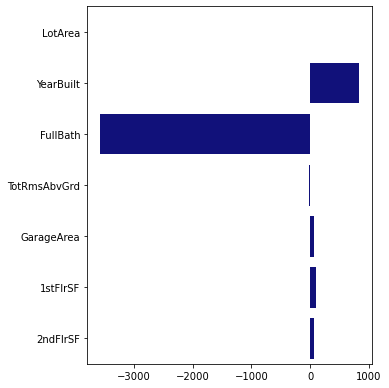

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(5.5, 5.5))
sns.barplot(x=lr.coef_, y=x_train.columns, color='darkblue')
plt.tight_layout()

Some more EDA on the data shows we would expect the coefficients to be positive.

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

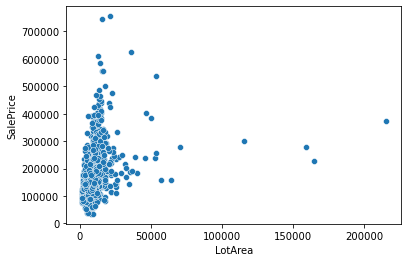

In [8]:
sns.scatterplot(x=df['LotArea'], y=df['SalePrice'])

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

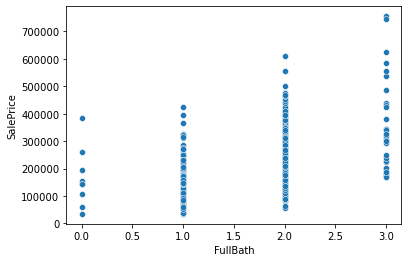

In [9]:
sns.scatterplot(x=df['FullBath'], y=df['SalePrice'])

In [10]:
df.groupby('FullBath').mean()

,LotArea,YearBuilt,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
FullBath,,,,,,,
0,14883.444444,1970.000000,4.777778,478.222222,1162.000000,21.333333,165200.888889
1,9187.786154,1954.215385,5.609231,375.616923,1003.972308,169.495385,134751.440000
2,11296.433594,1985.375000,7.173177,546.830729,1277.197917,466.377604,213009.825521
3,17360.484848,1979.181818,9.636364,670.606061,1621.424242,1153.545455,347822.909091


If we try a linear regression model with only the FullBath column, we see it is a positive coefficient:

In [11]:
lr.fit(df[['FullBath']], df['SalePrice'])

LinearRegression()

In [12]:
lr.coef_

array([80848.16678654])

## Linear regression with statsmodels

In [13]:
import statsmodels.api as sm

sm_lr = sm.OLS(y_train, sm.add_constant(x_train))
res = sm_lr.fit()
res.summary()

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     349.2
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          6.20e-273
Time:                        22:07:08   Log-Likelihood:                -13242.
No. Observations:                1095   AIC:                         2.650e+04
Df Residuals:                    1087   BIC:                         2.654e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.62e+06   1.07e+05    -15.165      0.000   -1.83e+06   -1.41e+06
LotArea          0.4697      0.126      3.729      0.000       0.223       0.717
YearBuilt      827.9396     55.108     15.024      0.000     719.810     936.069
FullBath     -3573.2296   3523.070     -1.014      0.311   -1.05e+04    3339.558
TotRmsAbvGrd   -25.9678   1451.611     -0.018      0.986   -2874.245    2822.309
GarageArea      64.6265      8.145      7.934      0.000      48.645      80.608
1stFlrSF        97.4383      5.722     17.029      0.000      86.211     108.665
2ndFlrSF        71.8384      5.337     13.461      0.000      61.367      82.310
==============================================================================
Omnibus:                      425.967   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33633.259
Skew:                          -0.872   Prob(JB):                         0.00
Kurtosis:                      30.095   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regularized linear regression

In [14]:
from sklearn.linear_model import LassoCV

l1_lr = LassoCV()
l1_lr.fit(x_train, y_train)

LassoCV()

In [15]:
l1_lr.alpha_

228888.65931632428

In [16]:
l1_lr.coef_

array([4.27009150e-01, 5.07702347e+02, 0.00000000e+00, 0.00000000e+00,
       8.02080376e+01, 9.60455704e+01, 6.70594638e+01])

In [17]:
from sklearn.linear_model import RidgeCV

l2_lr = RidgeCV()
l2_lr.fit(x_train, y_train)
l2_lr.coef_

array([ 4.69956875e-01,  8.26351818e+02, -3.35200764e+03, -4.04117423e+01,
        6.46405511e+01,  9.73549910e+01,  7.17380058e+01])

In [18]:
from sklearn.linear_model import ElasticNetCV

en_lr = ElasticNetCV()
en_lr.fit(x_train, y_train)
en_lr.coef_

array([ 1.28287688,  3.46879826,  0.        ,  0.        , 27.15263788,
       41.1722103 , 27.02242165])

In [19]:
en_lr.score(x_test, y_test)

0.40002308131932496

In [20]:
en_lr = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
en_lr.fit(x_train, y_train)
en_lr.coef_

array([4.27009150e-01, 5.07702347e+02, 0.00000000e+00, 0.00000000e+00,
       8.02080376e+01, 9.60455704e+01, 6.70594638e+01])

In [21]:
en_lr.alpha_

228888.65931632428

In [22]:
l1_lr.score(x_test, y_test)

0.7307830359520275

In [23]:
l2_lr.score(x_test, y_test)

0.7335592051271171

In [24]:
en_lr.score(x_test, y_test)

0.7307830359520275

In [25]:
res = sm_lr.fit_regularized(alpha=228888.65931632475, refit=True)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     346.1
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          4.39e-222
Time:                        22:07:11   Log-Likelihood:                -13367.
No. Observations:                1095   AIC:                         2.675e+04
Df Residuals:                    1090   BIC:                         2.678e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const                 0          0        nan        nan           0           0
LotArea          0.2824      0.140      2.015      0.044       0.007       0.557
YearBuilt       -7.0154      2.683     -2.615      0.009     -12.279      -1.752
FullBath              0          0        nan        nan           0           0
TotRmsAbvGrd          0          0        nan        nan           0           0
GarageArea     117.8113      8.380     14.059      0.000     101.369     134.254
1stFlrSF        97.0117      4.784     20.280      0.000      87.626     106.398
2ndFlrSF        64.7969      3.580     18.098      0.000      57.772      71.822
==============================================================================
Omnibus:                      347.240   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14472.824
Skew:                          -0.715   Prob(JB):                         0.00
Kurtosis:                      20.753   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

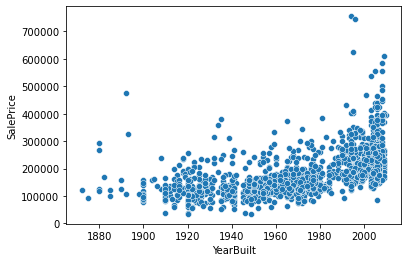

In [26]:
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'])

The coefficient for YearBuilt is negative and the other coefficients from statsmodels are different than from sklearn. It's not clear why.

## KNN regression

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))

0.7169076259605272
0.6053882073906485


# Evaluating regression models

In [28]:
from sklearn.metrics import r2_score

r2_score(y_train, [y_train.mean()] * y_train.shape[0])

0.0

In [29]:
r2 = r2_score(y_test, l1_lr.predict(x_test))
n, p = x_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(r2)
print(adj_r2)

0.7307830359520275
0.7255042719510869


In [30]:
from RegscorePy.aic import aic

aic(y_train, l1_lr.predict(x_train), x_train.shape[1])

23428.90924189375

In [31]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, l1_lr.predict(x_test))

1885948035.2885706

In [32]:
mse(y_test, l1_lr.predict(x_test), squared=False)

43427.50321269427

In [33]:
df['SalePrice'].median()

163000.0

In [34]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, l1_lr.predict(x_test))

27295.84646037545

# Linear regression assumptions

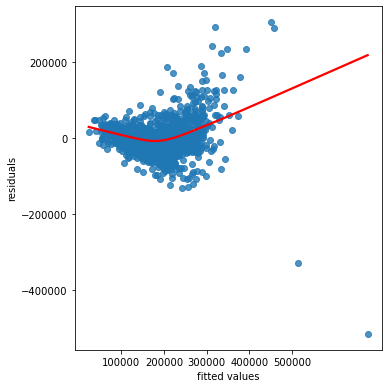

In [35]:
predictions = l1_lr.predict(df.drop('SalePrice', axis=1))
residuals = df['SalePrice'] - predictions
f = plt.figure(figsize=(5.5, 5.5))
sns.regplot(x=predictions,
            y=residuals,
            lowess=True,
            line_kws={'color': 'red'})
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.xticks([100000., 200000., 300000., 400000., 500000.])
plt.tight_layout()

In [36]:
for i in range(1, 11):
    print(df['SalePrice'].autocorr(i))

-0.0014076388067916158
0.011126167230717144
-0.036098810883062264
0.010507784735609427
0.008232970044769475
-0.011347502463551441
0.023056034545956217
-0.005425814504682634
-0.037611333392785905
-0.00830061172352494


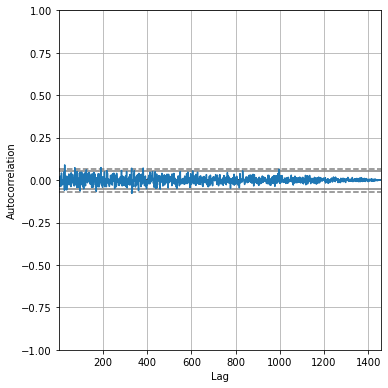

In [37]:
f = plt.figure(figsize=(5.5, 5.5))
pd.plotting.autocorrelation_plot(df['SalePrice'])
plt.tight_layout()

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


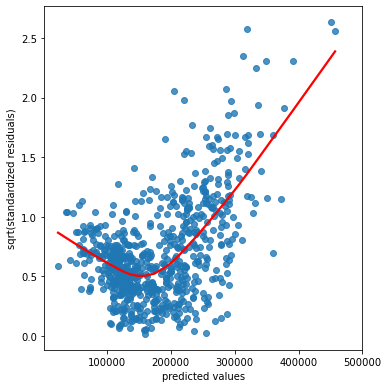

In [38]:
import numpy as np

standardized_residuals = np.sqrt(residuals / residuals.std())

f = plt.figure(figsize=(5.5, 5.5))
sns.regplot(x=predictions,
            y=standardized_residuals,
            lowess=True,
            line_kws={'color': 'red'})
plt.xlabel('predicted values')
plt.ylabel('sqrt(standardized residuals)')
plt.xticks([100000., 200000., 300000., 400000., 500000.])
plt.tight_layout()

# Forecasting

In [39]:
btc_df = pd.read_csv('data/bitcoin_price.csv')
btc_df['time'] = pd.to_datetime(btc_df['time'], unit='ms')
btc_df.set_index('time', inplace=True)
btc_df = btc_df[['close', 'volume']]
btc_df.head()

,close,volume
time,,
2013-03-31,93.033000,3083.079791
2013-04-01,103.999000,5224.401313
2013-04-02,118.229354,8376.527478
2013-04-03,134.700000,12996.245072
2013-04-04,132.899000,6981.668305


In [40]:
btc_df['close_1d_future'] = btc_df['close'].shift(-1)
btc_df.dropna(inplace=True)

In [41]:
btc_df.shape[0] * 0.75

2094.0

In [42]:
features = btc_df.drop('close_1d_future', axis=1)
targets = btc_df['close_1d_future']

train_idx = int(0.75 * btc_df.shape[0])
x_train = features.iloc[:train_idx]
y_train = targets.iloc[:train_idx]
x_test = features.iloc[train_idx:]
y_test = targets.iloc[train_idx:]

In [43]:
from sklearn.model_selection import TimeSeriesSplit

l1_lr = LassoCV(cv=TimeSeriesSplit())
l1_lr.fit(x_train, y_train)
print(mae(y_train, l1_lr.predict(x_train)))
print(mae(y_test, l1_lr.predict(x_test)))

85.63489721292633
220.80838114586572


In [44]:
l1_lr.alpha_

33705.48377819215

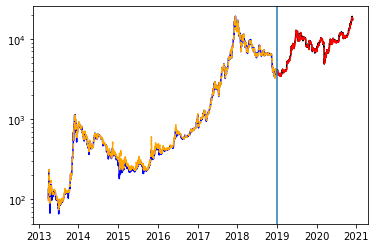

In [45]:
train_dates = btc_df.index[:train_idx]
test_dates = btc_df.index[train_idx:]
train_predictions = l1_lr.predict(x_train)
test_predictions = l1_lr.predict(x_test)
plt.plot_date(train_dates, y_train, fmt='-', color='b')
plt.plot_date(train_dates, train_predictions, fmt='--', color='orange')
plt.plot_date(test_dates, y_test, fmt='-', color='k')
plt.plot_date(test_dates, test_predictions, fmt='--', color='r')
plt.axvline(btc_df.index[train_idx])
plt.yscale('log')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

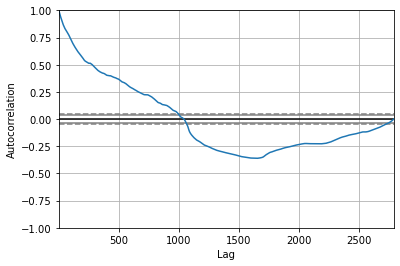

In [46]:
pd.plotting.autocorrelation_plot(btc_df['close'])

In [47]:
btc_df.reset_index(inplace=True)
btc_df.drop('close_1d_future', axis=1, inplace=True)
btc_df.rename(columns={'close': 'y', 'time': 'ds'}, inplace=True)

In [48]:
from prophet import Prophet

m = Prophet()
m.fit(btc_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

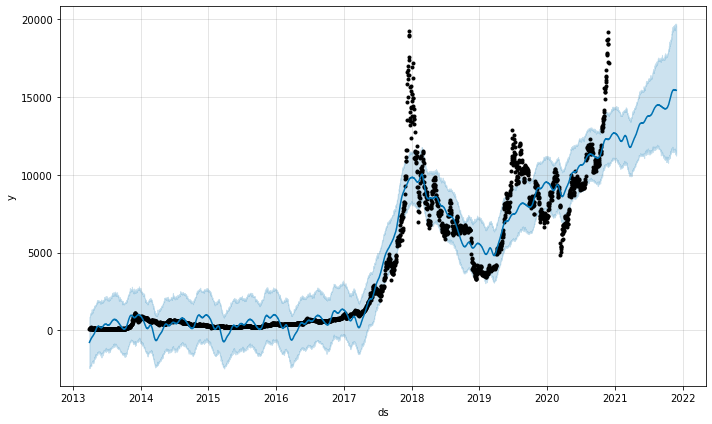

<Figure size 396x396 with 0 Axes>

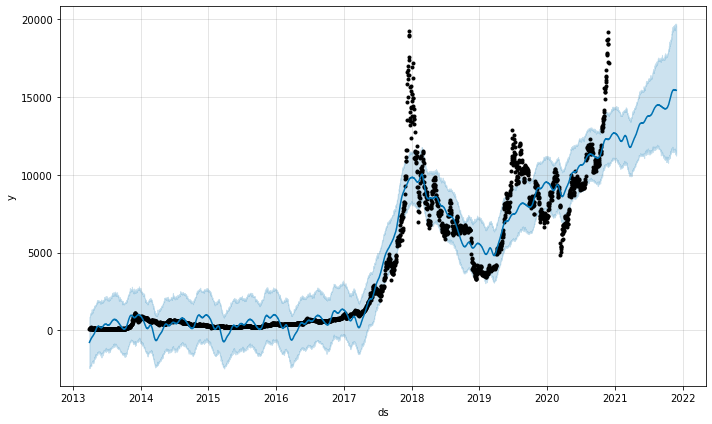

In [50]:
f = plt.figure(figsize=(5.5, 5.5))
m.plot(forecast)

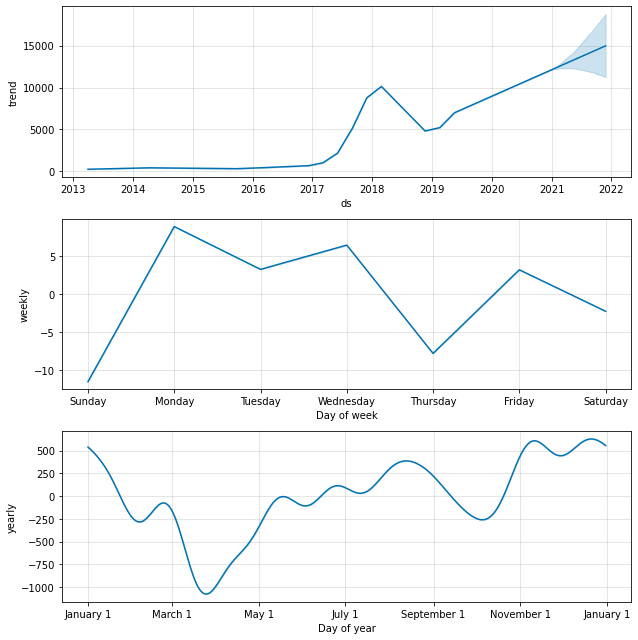

In [51]:
components = m.plot_components(forecast)